## Pandas

In [1]:
%pip install pandas

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.3 MB 12.4 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.3 MB 22.1 MB/s eta 0:00:01
   ------- -------------------------------- 2.1/11.3 MB 22.1 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.3 MB 13.1 MB/s eta 0:00:01
   ------------- -------------------------- 4.0/11.3 MB 16.9 MB/s eta 0:00:01
   ------------------- -------------------- 5.4/11.3 MB 19.3 MB/s eta 0:00:01
   ------------------------ --------------- 6.9/11.3 MB 21.0 MB/s eta 0:00:01
   ----------------------------- ---------- 8.3/11.3 MB 22.0 MB/s eta 0:00:01
   ---------------------------------- ----- 9.9/11.3 MB 23.3 MB/s eta 0:00:01
   ---------------------------------------  11.3/11.3 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 23.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/509.2 kB ? eta -:--:--


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd 
pd.__version__

'2.3.3'

In [ ]:
df = pd.read_csv("./data_0108/heroes.csv")

In [15]:
df

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,1.150000e+10
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,6.000000e+02
3,원더우먼,27,공주,데미스키라,178,NaN
4,헐크,33,핵물리학자,미국,270,1.000000e+09
5,캡틴마블,25,파일럿,미국,170,3.400000e+08
6,블랙위도우,32,스파이,러시아,170,5.000000e+07


In [ ]:
# 포맷 바꾸는 메소드. 지수 형식의 수들을 원래대로 보여줌 
# 원본 데이터를 직접 바꾸는 것은 아님 
pd.options.display.float_format = '{:.0f}'.format

### 데이터 정보 확인하기

In [18]:
df.head(5)

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,600
3,원더우먼,27,공주,데미스키라,178,NaN
4,헐크,33,핵물리학자,미국,270,1000000000


In [19]:
df.sample()

,이름,나이,직업,국적,키,재산
5,캡틴마블,25,파일럿,미국,170,340000000


In [21]:
df.info()
# object = string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      7 non-null      object 
 1   나이      7 non-null      int64  
 2   직업      7 non-null      object 
 3   국적      7 non-null      object 
 4   키       7 non-null      int64  
 5   재산      5 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


In [22]:
df.describe()

,나이,키,재산
count,7,7,5
mean,34,190,2578000120
std,13,36,5003440739
min,18,170,600
25%,26,172,50000000
50%,32,177,340000000
75%,39,184,1000000000
max,58,270,11500000000


In [11]:
df.shape

(7, 6)

### 데이터 통계 살펴보기

In [26]:
# 컬럼에 유일한 값 확인하기 
df['국적'].unique()

array(['미국', '아스가르드', '데미스키라', '러시아'], dtype=object)

In [28]:
df['국적'].value_counts()

국적
미국       4
아스가르드    1
데미스키라    1
러시아      1
Name: count, dtype: int64

In [34]:
# 상위 n개
df['나이'].nlargest() #n이 초기화 되어져 있음. n입력하지 않아도 됨.
df['나이'].nsmallest(2)

2    18
5    25
Name: 나이, dtype: int64

In [36]:
# 상위 n개
# 전체 레코드를 보려면 n개, 기준이 될 컬럼명 둘 다 입력해줘야 함
df.nlargest(5,'나이') 

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
4,헐크,33,핵물리학자,미국,270,1000000000
6,블랙위도우,32,스파이,러시아,170,50000000
3,원더우먼,27,공주,데미스키라,178,NaN


In [41]:
# 미션
# 키가 큰 순서대로 7명을 정렬
df.nlargest(7,'키')['이름']

4       헐크
1       토르
3     원더우먼
2    스파이더맨
0     아이언맨
5     캡틴마블
6    블랙위도우
Name: 이름, dtype: object

### 그룹화하기

In [141]:
df.groupby('국적')['나이'].mean()

국적
데미스키라   27
러시아     32
미국      34
아스가르드   45
Name: 나이, dtype: float64

### 데이터 인덱싱 및 슬라이싱

In [24]:
df['국적']

0       미국
1    아스가르드
2       미국
3    데미스키라
4       미국
5       미국
6      러시아
Name: 국적, dtype: object

In [43]:
# 데이터 일부분 선택
df['이름']
type(df['이름']) # 1개의 컬럼 = 시리즈 = array

pandas.core.series.Series

In [45]:
# df['이름','직업']
df[['이름','직업']]

,이름,직업
0,아이언맨,CEO
1,토르,신
2,스파이더맨,고등학생
3,원더우먼,공주
4,헐크,핵물리학자
5,캡틴마블,파일럿
6,블랙위도우,스파이


In [46]:
type(df[['이름','직업']]) # 2개 이상의 컬럼 = 데이터 프레임

pandas.core.frame.DataFrame

In [49]:
# 미션2
# 시리즈 데이터에서 일부 데이터 슬라이싱하기
# 7개 이름 중 아이언맨-헐크까지 슬라이싱하기
df['이름'][:5]

0     아이언맨
1       토르
2    스파이더맨
3     원더우먼
4       헐크
Name: 이름, dtype: object

In [51]:
df[:3] # numpy처럼 슬라이싱하는 것도 가능함 

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,600


In [54]:
df[5:]

,이름,나이,직업,국적,키,재산
5,캡틴마블,25,파일럿,미국,170,340000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [59]:
# df[4] #KeyError : df다음에 오는 대괄호 안에는 컬럼 이름만 와야함
# df[4, '이름'] #마찬가지로 에러
# Numpy와는 다른 부분
# 그래서 iloc, loc를 사용

# df.iloc[행번호, 열번호] : 행 탐색
df.iloc[:4,]

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,600
3,원더우먼,27,공주,데미스키라,178,NaN


In [63]:
df.iloc[:3, :3]

,이름,나이,직업
0,아이언맨,58,CEO
1,토르,45,신
2,스파이더맨,18,고등학생


In [62]:
df.iloc[[1,3,5]]

,이름,나이,직업,국적,키,재산
1,토르,45,신,아스가르드,190,NaN
3,원더우먼,27,공주,데미스키라,178,NaN
5,캡틴마블,25,파일럿,미국,170,340000000


In [65]:
# df.loc['행이름','열이름']
df.loc[2] # 인덱스가 숫자인 경우에는 숫자를 자동으로 string으로 인식

이름    스파이더맨
나이       18
직업     고등학생
국적       미국
키       177
재산      600
Name: 2, dtype: object

In [66]:
df.loc[3,'이름']

'원더우먼'

In [68]:
# 미션
# loc를 이용해서 이름,직업 열 + 0-2 행 추출해보기
df.loc[:2,['이름','직업']] 

#행은 인덱스 번호, 끝번 포함
#열은 이름으로, 여러 개 열이므로 리스트로 묶기

,이름,직업
0,아이언맨,CEO
1,토르,신
2,스파이더맨,고등학생


In [70]:
df.loc[:2, '이름':'직업'] #연속된 열 추출할 시에는 : 사용

,이름,나이,직업
0,아이언맨,58,CEO
1,토르,45,신
2,스파이더맨,18,고등학생


조건에 따라 인덱싱/슬라이싱

In [75]:
# 나이가 30살 이상인 레코드만 추출하기
# df['나이'] >= 30 #boolean indexing으로 T/F 시리즈 나옴
df.loc[ df['나이'] >= 30 ]

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
4,헐크,33,핵물리학자,미국,270,1000000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [77]:
df.loc[ df['직업']=='스파이' , ['이름','국적'] ] 

,이름,국적
6,블랙위도우,러시아


In [89]:
# 미션 
# 나이가 30초과, 50미만인 레코드만 추출
df[ (df['나이'] > 30 ) & (df['나이'] < 50 ) ]
df.loc[ (df['나이'] > 30 ) & (df['나이'] < 50 ) ]

,이름,나이,직업,국적,키,재산
1,토르,45,신,아스가르드,190,NaN
4,헐크,33,핵물리학자,미국,270,1000000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [95]:
# 미션
# 키가 180 이상인 레코드의 이름과 나이 컬럼만 출력
df.loc[ df['키'] >= 180 , ['이름', '나이'] ]
df[df['키'] >= 180][['이름', '나이'] ]

,이름,나이
1,토르,45
4,헐크,33


### 데이터 변경하기

In [96]:
df1 = df.copy()

In [98]:
# 컬럼 전체에 새로운 값 할당 
# 개수를 맞춰줘야 함
df1['국적'] = ['대한민국', '미국', '스리랑카', '중국', '일본', '대한민국', '대한민국']
df1

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,대한민국,174,11500000000
1,토르,45,신,미국,190,NaN
2,스파이더맨,18,고등학생,스리랑카,177,600
3,원더우먼,27,공주,중국,178,NaN
4,헐크,33,핵물리학자,일본,270,1000000000
5,캡틴마블,25,파일럿,대한민국,170,340000000
6,블랙위도우,32,스파이,대한민국,170,50000000


In [99]:
# 컬럼 생성
df2 = df.copy()
df2['전투력']=[90, 90, 95, 65, 78, 99, 40]
df2

,이름,나이,직업,국적,키,재산,전투력
0,아이언맨,58,CEO,미국,174,11500000000,90
1,토르,45,신,아스가르드,190,NaN,90
2,스파이더맨,18,고등학생,미국,177,600,95
3,원더우먼,27,공주,데미스키라,178,NaN,65
4,헐크,33,핵물리학자,미국,270,1000000000,78
5,캡틴마블,25,파일럿,미국,170,340000000,99
6,블랙위도우,32,스파이,러시아,170,50000000,40


In [100]:
# 일괄적으로 값 변경
df2['전투력'] = df2['전투력'] -10
df2

,이름,나이,직업,국적,키,재산,전투력
0,아이언맨,58,CEO,미국,174,11500000000,80
1,토르,45,신,아스가르드,190,NaN,80
2,스파이더맨,18,고등학생,미국,177,600,85
3,원더우먼,27,공주,데미스키라,178,NaN,55
4,헐크,33,핵물리학자,미국,270,1000000000,68
5,캡틴마블,25,파일럿,미국,170,340000000,89
6,블랙위도우,32,스파이,러시아,170,50000000,30


컬럼 변경하기

In [106]:
# 컬럼 이름 직접 변경
df3 = df.copy()
df3.columns = ['name', 'age', 'job', 'nation', 'height', 'money']
df3.head(3)

,name,age,job,nation,height,money
0,아이언맨,58,CEO,미국,174,11500000000
1,토르,45,신,아스가르드,190,NaN
2,스파이더맨,18,고등학생,미국,177,600


In [110]:
# 특정 컬럼 이름만 변경하기
# 덮어써주지 않으면 적용 안 됨! 
df3.rename( columns = { 'name' : '이름', 'age':'나이'}).head(1)

,이름,나이,job,nation,height,money
0,아이언맨,58,CEO,미국,174,11500000000


In [109]:
df3.head(1)

,name,age,job,nation,height,money
0,아이언맨,58,CEO,미국,174,11500000000


In [111]:
# 적용하는 방법1 : 변수에 다시 할당
df3 = df3.rename( columns = { 'name' : '이름', 'age':'나이'}).head(1)
df3.head(1)

,이름,나이,job,nation,height,money
0,아이언맨,58,CEO,미국,174,11500000000


In [113]:
# 적용하는 방법2 : inplace=True 옵션 주기
df3.rename( columns = { '이름' : 'name', '나이':'age'}, inplace=True )
df3.head(1)

,name,age,job,nation,height,money
0,아이언맨,58,CEO,미국,174,11500000000


컬럼값 일괄 변경(단위 수정)

In [131]:
df.columns

Index(['이름', '나이', '직업', '국적', '키', '재산'], dtype='object')

In [143]:
def add_cm(height):
    return str(height) +'cm'     #height이 int이므로 str로 변경

df['키'].apply(add_cm)

0    174cm
1    190cm
2    177cm
3    178cm
4    270cm
5    170cm
6    170cm
Name: 키, dtype: object

컬럼 삭제하기

In [116]:
# 이것도 마찬가지로 원본에 적용하기 위해서는
# 1.변수에 저장  2. inplace=True
df2.drop(columns=['전투력'], inplace=True)
df2.head(1)

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000


### 결측치 처리하기

In [117]:
# 결측치 확인하기
df[df['재산'].isnull()]

,이름,나이,직업,국적,키,재산
1,토르,45,신,아스가르드,190,NaN
3,원더우먼,27,공주,데미스키라,178,NaN


In [118]:
df.isnull().sum()   # 재산에 2개의 결측치

이름    0
나이    0
직업    0
국적    0
키     0
재산    2
dtype: int64

In [119]:
df.info()  # 재산에 2개의 결측치 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      7 non-null      object 
 1   나이      7 non-null      int64  
 2   직업      7 non-null      object 
 3   국적      7 non-null      object 
 4   키       7 non-null      int64  
 5   재산      5 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.0+ bytes


In [121]:
# 결측치 있는 행을 지움
df5 = df.copy()
df5.dropna()

,이름,나이,직업,국적,키,재산
0,아이언맨,58,CEO,미국,174,11500000000
2,스파이더맨,18,고등학생,미국,177,600
4,헐크,33,핵물리학자,미국,270,1000000000
5,캡틴마블,25,파일럿,미국,170,340000000
6,블랙위도우,32,스파이,러시아,170,50000000


In [124]:
# 0으로 채우기
df['재산'].fillna(0)

0   11500000000
1             0
2           600
3             0
4    1000000000
5     340000000
6      50000000
Name: 재산, dtype: float64

In [125]:
# 평균값으로 대치하기
df['재산'].fillna(df['재산'].mean())

0   11500000000
1    2578000120
2           600
3    2578000120
4    1000000000
5     340000000
6      50000000
Name: 재산, dtype: float64

시계열/ 날짜 / 온도 같이 순차적 변화+상황이 크게 변하지 않는 데이터의 경우  
-> 이전값 대치 / 이후값 대치

In [128]:
# 이전값으로 대치하기
df['재산'].ffill()
df['재산'].fillna(method='ffill') # deprecated될 예정

C:\Users\USER\AppData\Local\Temp\ipykernel_10316\1792828262.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['재산'].fillna(method='ffill') # deprecated될 예정


0   11500000000
1   11500000000
2           600
3           600
4    1000000000
5     340000000
6      50000000
Name: 재산, dtype: float64

### 미션

In [186]:
# sales, user 데이터프레임으로 불러오기
sales = pd.read_csv(r'.\data_0108\sales_data.csv')
user = pd.read_csv(r'.\data_0108\user_data.csv')

In [187]:
sales.head(1)

,customer_id,order_date,product_category,amount,channel,discount_rate
0,C001,2025-09-01,가전,1200000,온라인,0


In [261]:
pd.options.display.float_format = '{:.2f}'.format #포맷 변경: 소수점 2째 자리까지
sales.head(1)

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00


In [214]:
user.head(1)

,고객ID,고객명,가입지역
0,C001,김민준,서울


In [215]:
# 컬럼명을 한글로 변경
# sales : '고객ID', '구매일자', '제품분류', '구매금액', '구매채널', '할인율'
sales.columns = ['고객ID', '구매일자', '제품분류', '구매금액', '구매채널', '할인율']
sales.head(1)

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10


In [262]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    10 non-null     object 
 1   구매일자    10 non-null     object 
 2   제품분류    10 non-null     object 
 3   구매금액    10 non-null     int64  
 4   구매채널    10 non-null     object 
 5   할인율     8 non-null      float64
 6   실구매금액   8 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes


In [216]:
# 컬럼명을 한글로 변경
# user : '고객ID', '고객명', '가입지역'
user.columns = ['고객ID', '고객명', '가입지역']
user.head(1)

,고객ID,고객명,가입지역
0,C001,김민준,서울


In [263]:
# 구매금액이 10000원 이상인 데이터만 필터링 #sales
sales[ sales['구매금액'] >= 10000 ]

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,2250.00
2,C003,2025-09-02,식료품,12000,온라인,NaN,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15,13350.00
4,C004,2025-09-03,주방용품,21000,온라인,0.00,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05,125000.00
7,C003,2025-09-04,주방용품,62000,오프라인,NaN,NaN
9,C004,2025-09-05,의류,150000,온라인,0.20,30000.00


In [ ]:
# '온라인' 채널에서 발생한 구매 중 5000원 이상인 것만 필터링 #sales
sales[ (sales['구매채널']=='온라인') & (sales['구매금액'] >=5000) ]

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율
0,C001,2025-09-01,가전,1200000,온라인,0.10
2,C003,2025-09-02,식료품,12000,온라인,NaN
3,C001,2025-09-02,의류,89000,온라인,0.15
4,C004,2025-09-03,주방용품,21000,온라인,0.00
6,C005,2025-09-04,도서,9900,온라인,0.00
8,C001,2025-09-05,식료품,8500,온라인,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20


In [265]:
# '가전', '주방용품' 에 속하는 데이터만 필터링
# sales[ (sales['제품분류'] == '가전') | (sales['제품분류'] == '주방용품') ]
sales[sales['제품분류'].isin(['가전', '주방용품'])]

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,2250.00
4,C004,2025-09-03,주방용품,21000,온라인,0.00,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05,125000.00
7,C003,2025-09-04,주방용품,62000,오프라인,NaN,NaN


In [220]:
# 각 열별 결측치 개수 확인
sales.isnull().sum()

고객ID    0
구매일자    0
제품분류    0
구매금액    0
구매채널    0
할인율     2
dtype: int64

In [266]:
# 결측치가 있는 행 전체 삭제
sales_dropna = sales.copy()
# sales_dropna['할인율'].dropna(inplace=True) #시리즈에 적용하면 시리즈 복사본에 적용이 되므로 삭제 안 됨
sales.dropna()

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,120000.00
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,2250.00
3,C001,2025-09-02,의류,89000,온라인,0.15,13350.00
4,C004,2025-09-03,주방용품,21000,온라인,0.00,0.00
5,C002,2025-09-03,가전,2500000,오프라인,0.05,125000.00
6,C005,2025-09-04,도서,9900,온라인,0.00,0.00
8,C001,2025-09-05,식료품,8500,온라인,0.00,0.00
9,C004,2025-09-05,의류,150000,온라인,0.20,30000.00


In [274]:
# 특정 값으로 결측치 채우기
# sales_fill['할인율'].fillna( sales['할인율'].mean(), inplace=True )
# 이 방법은 deprecated 경고가 나오므로 직접 할당 사용하기
sales['할인율'] = sales['할인율'].fillna(sales['할인율'].median())
sales

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,1080000
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,42750
2,C003,2025-09-02,식료품,12000,온라인,0.05,11400
3,C001,2025-09-02,의류,89000,온라인,0.15,75650
4,C004,2025-09-03,주방용품,21000,온라인,0.00,21000
5,C002,2025-09-03,가전,2500000,오프라인,0.05,2375000
6,C005,2025-09-04,도서,9900,온라인,0.00,9900
7,C003,2025-09-04,주방용품,62000,오프라인,0.05,58900
8,C001,2025-09-05,식료품,8500,온라인,0.00,8500
9,C004,2025-09-05,의류,150000,온라인,0.20,120000


In [275]:
# 할인률이 적용된 df['실구매금액'] 새롭게 생성
sales['실구매금액'] = sales['구매금액'] * (1-sales['할인율'])
sales['실구매금액'] = sales['실구매금액'].astype(int)
sales.head()

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액
0,C001,2025-09-01,가전,1200000,온라인,0.10,1080000
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,42750
2,C003,2025-09-02,식료품,12000,온라인,0.05,11400
3,C001,2025-09-02,의류,89000,온라인,0.15,75650
4,C004,2025-09-03,주방용품,21000,온라인,0.00,21000


In [276]:
# 고객 등급을 'VIP'와 '일반'으로 나누기(구매금액이 10000 이상이면 VIP)
sales['구매금액'].apply(lambda x: 'VIP' if x>=10000 else '일반')

0    VIP
1    VIP
2    VIP
3    VIP
4    VIP
5    VIP
6     일반
7    VIP
8     일반
9    VIP
Name: 구매금액, dtype: object

In [231]:
# 제품분류별 구매금액의 평균 구하기
sales.groupby('제품분류')['구매금액'].mean()

제품분류
가전     1850000.00
도서        9900.00
식료품      10250.00
의류      119500.00
주방용품     42666.67
Name: 구매금액, dtype: float64

In [ ]:
# 구매채널별로 그룹화하여, 구매금액의 총합과 평균 동시 구하기
# print('평균\n', sales.groupby('구매채널')['구매금액'].mean())
# print('총합\n', sales.groupby('구매채널')['구매금액'].sum())
sales.groupby('구매채널')['구매금액'].agg(['mean','sum']) #aggregate

,mean,sum
구매채널,,
오프라인,869000.00,2607000
온라인,212914.29,1490400


### 데이터프레임 통합하기

In [285]:
# 두 데이터프레임 각각에 존재하는 고유값을 기준으로 병합할 때 사용
# on 옵션 : 기본키값 (지정하지 않으면 기본으로 공통되는 속성을 기준으로 병합)
merged_df = pd.merge(sales, user, on='고객ID')
merged_df

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액,고객명,가입지역
0,C001,2025-09-01,가전,1200000,온라인,0.10,1080000,김민준,서울
1,C002,2025-09-01,주방용품,45000,오프라인,0.05,42750,이서연,부산
2,C003,2025-09-02,식료품,12000,온라인,0.05,11400,박도윤,인천
3,C001,2025-09-02,의류,89000,온라인,0.15,75650,김민준,서울
4,C004,2025-09-03,주방용품,21000,온라인,0.00,21000,최지우,서울
5,C002,2025-09-03,가전,2500000,오프라인,0.05,2375000,이서연,부산
6,C005,2025-09-04,도서,9900,온라인,0.00,9900,정하은,광주
7,C003,2025-09-04,주방용품,62000,오프라인,0.05,58900,박도윤,인천
8,C001,2025-09-05,식료품,8500,온라인,0.00,8500,김민준,서울
9,C004,2025-09-05,의류,150000,온라인,0.20,120000,최지우,서울


### 데이터프레임 파일로 저장하기

In [286]:
# csv 파일로 저장
merged_df.to_csv('./data_0108/sales_report.csv', index=False, encoding='utf-8')
# 인코딩은 지정하는 것이 좋음 

## Matplotlib

In [287]:
%pip install matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/52.8 kB 330.3 kB/s eta 0:00:01
     ------------------------------------ - 51.2/52.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 340.7 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     ------------------------------------ - 112.6/116.4 kB 6.8 MB/s eta 0:00:01
     -------------------------------------- 116.4/116.4 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.1 MB 56.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 52.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 52.4 MB/s eta 0:00:01
   ---------------------------------------  8.1/8.1 MB 51.7 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [289]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


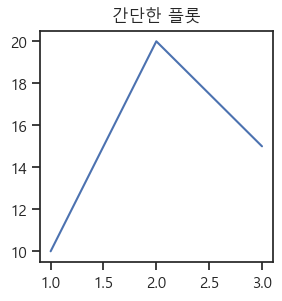

In [362]:
# 폰트 변경: 기본값(영어) -> 한글 
plt.rc('font', family='Malgun Gothic') #윈도우 기본 폰트
plt.rc('axes', unicode_minus=False)

#테스트
plt.figure(figsize=(3,3))   # 플롯 사이즈
plt.plot([1, 2, 3], [10, 20, 15]) 
plt.title('간단한 플롯')
plt.show()

### 선 그래프
plt.plot( x축 데이터, y축 데이터 )

In [302]:
# --- 데이터 생성---
data = {
    '월': pd.to_datetime(['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01']),
    '방문자수': [1500, 1800, 1700, 2100, 2500, 2300]
}
df_line = pd.DataFrame(data) # 데이터프레임으로 생성 
 
plt.figure(figsize=(10, 6)) # figsize 설정

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

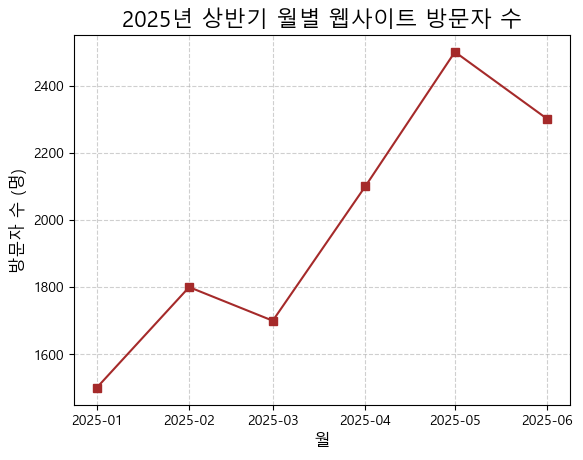

In [310]:
# 1. 플롯 그리기
plt.plot(
    df_line['월'],          # x축 
    df_line['방문자수'],     # y축
    marker='s',             # 점 모양
    linestyle='-',          # 선 모양
    color='brown'      # 그래프 색
)

# 2. 그래프 꾸미기 (ax.set_ 대신 plt. 사용)
plt.title('2025년 상반기 월별 웹사이트 방문자 수', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('방문자 수 (명)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 바 차트

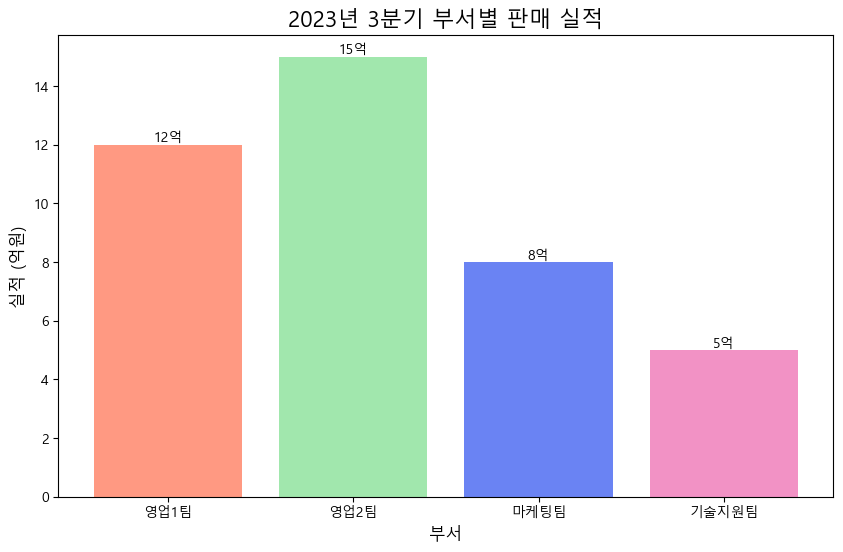

In [314]:
import matplotlib.pyplot as plt
import pandas as pd
 
data = {
    '부서': ['영업1팀', '영업2팀', '마케팅팀', '기술지원팀'],
    '실적(억원)': [12, 15, 8, 5]
}
df_bar = pd.DataFrame(data)
 
plt.figure(figsize=(10, 6))
 
bars = plt.bar(
    df_bar['부서'],
    df_bar['실적(억원)'],
    color=["#FF9982", "#A1E7AD", "#6A83F3", "#F292C5"]
)
 
plt.title('2023년 3분기 부서별 판매 실적', fontsize=16)
plt.xlabel('부서', fontsize=12)
plt.ylabel('실적 (억원)', fontsize=12)
 
# 각 바 위에 실제 값 표시 (plt.text 사용)
for bar in bars:
    yval = bar.get_height()
    # plt.text(x좌표, y좌표, 내용, 정렬방식)
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval,
        f'{yval}억',
        va='bottom',
        ha='center'
    )
 
plt.show()

### 산점도(Scatter plot)

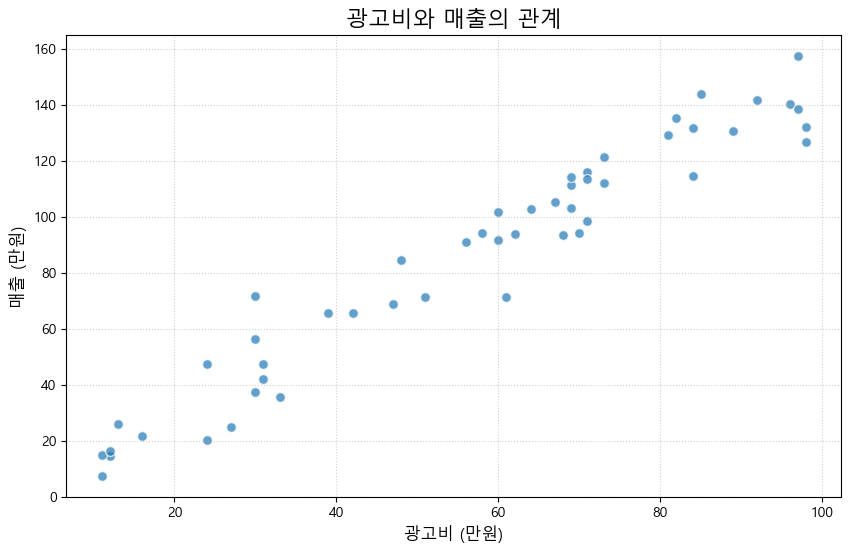

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
np.random.seed(42)
advertising_cost = np.random.randint(10, 100, 50)
sales = advertising_cost * 1.5 + np.random.normal(0, 10, 50)
 
plt.figure(figsize=(10, 6))
plt.scatter(
    advertising_cost,
    sales,
    alpha=0.7,         # 점 투명도
    edgecolors='w',    #
    s=50               # 점 사이즈
)
 
plt.title('광고비와 매출의 관계', fontsize=16)
plt.xlabel('광고비 (만원)', fontsize=12)
plt.ylabel('매출 (만원)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
 
plt.show()

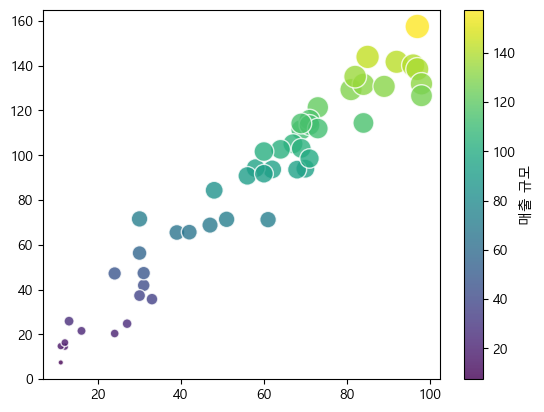

In [320]:
plt.scatter(
    advertising_cost,
    sales,
    c=sales,          # 매출 값에 따라 색상 부여
    cmap='viridis',   # 색상 지도 설정
    alpha=0.8,
    edgecolors='w',
    s=sales * 2       # 매출이 클수록 점도 크게
)
plt.colorbar(label='매출 규모') # 색상 막대 추가

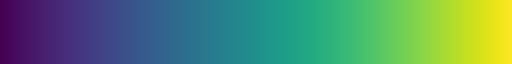

In [322]:
plt.get_cmap()

### 히트맵
- 속성과 속성 간의 상관 관계, 서로 간 상호작용
- 보통 히트맵은 matplotlib 말고 seaborn을 주로 사용
- seaborn이 복잡한 코드를 줄여줌. 디자인도 조금 더 세련됨

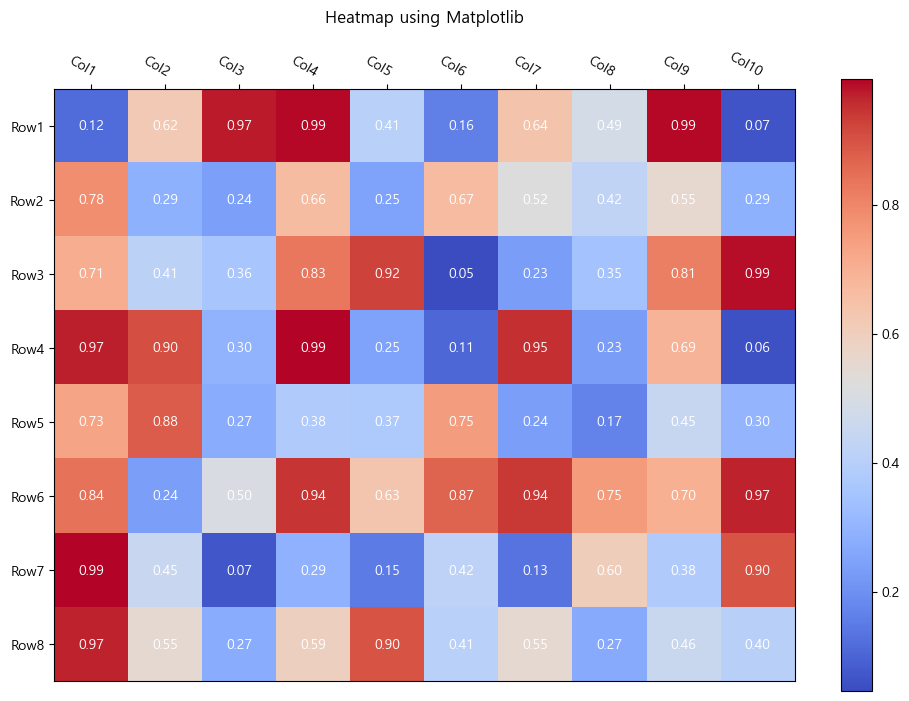

In [326]:
import matplotlib.pyplot as plt
import numpy as np
 
data = np.random.rand(8, 10)
rows = [f'Row{i+1}' for i in range(data.shape[0])]
cols = [f'Col{i+1}' for i in range(data.shape[1])]
 
plt.figure(figsize=(10, 7))
im = plt.imshow(data, cmap='coolwarm')
plt.colorbar(im)
plt.xticks(np.arange(data.shape[1]), labels=cols)
plt.yticks(np.arange(data.shape[0]), labels=rows)
plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
plt.setp(plt.gca().get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
 
# 각 셀에 텍스트 추가 (Annotation)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        # plt.text(x, y, s) 순서입니다.
        plt.text(j, i, f'{data[i, j]:.2f}',
                 ha="center", va="center", color="w")
 
plt.title("Heatmap using Matplotlib", pad=20)
plt.tight_layout()
plt.show()

# 아래 플롯에서는 특정 열과 행 간의 상관관계가 높은 값

## Seaborn
- 세련된 그래프 디자인
- 데이터 내부적으로 가지고 있어 가져올 수 있다는 장점

In [327]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [328]:
import seaborn as sns

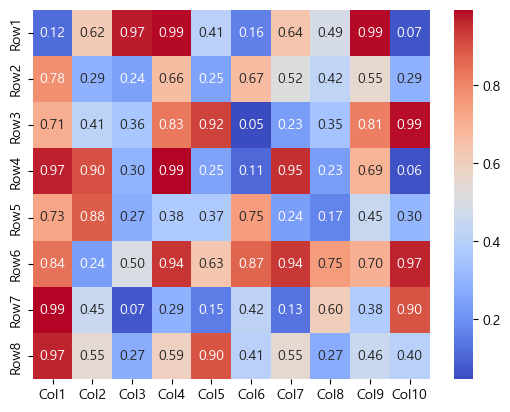

In [330]:
# seaborn의 heatmap( ) 메서드가 존재, 수정해 사용
sns.heatmap(data, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=cols, yticklabels=rows)
plt.show() # matplotlib으로 보여주기

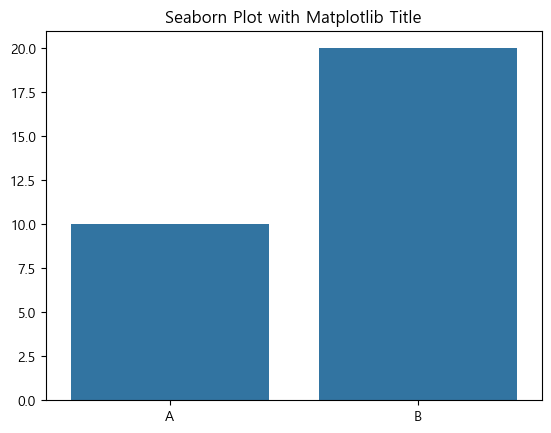

In [331]:
# 바플롯 그리기
sns.barplot(x=['A', 'B'], y=[10, 20])
plt.title("Seaborn Plot with Matplotlib Title")
plt.show()

Seaborn 내장 데이터

In [340]:
# seaborn 내장 데이터 가져오기
tips = sns.load_dataset('tips')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


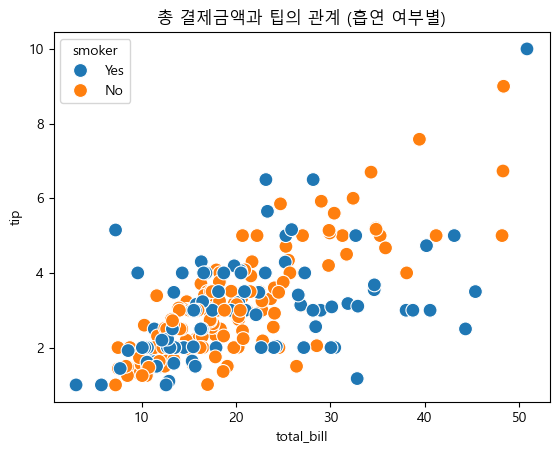

In [338]:
# hue, 흡연자인지 아닌지에 따라 팁과 전체 금액의 상관관계
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="smoker", s=100)
plt.title("총 결제금액과 팁의 관계 (흡연 여부별)")
plt.show()

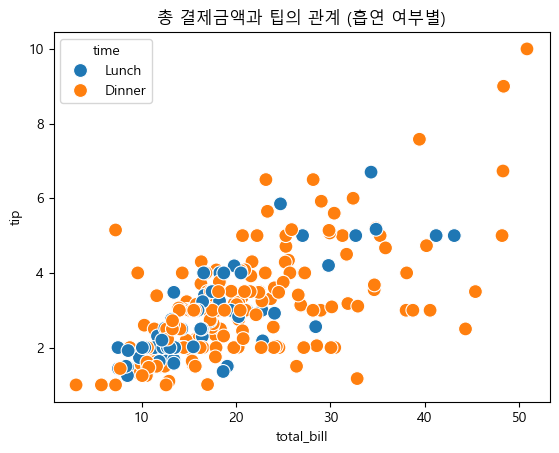

In [339]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time", s=100)
plt.title("총 결제금액과 팁의 관계 (흡연 여부별)")
plt.show()

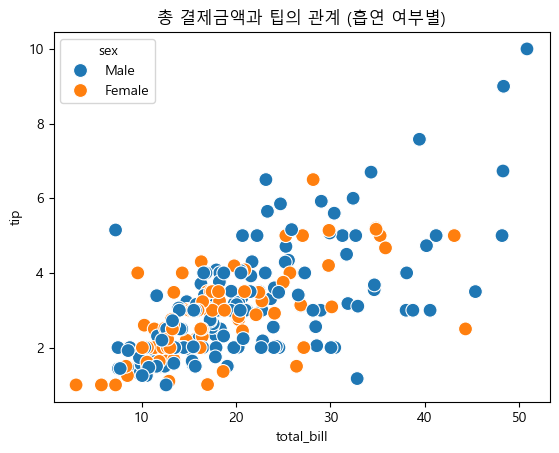

In [342]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", s=100)
plt.title("총 결제금액과 팁의 관계 (흡연 여부별)")
plt.show()

### 박스 플롯

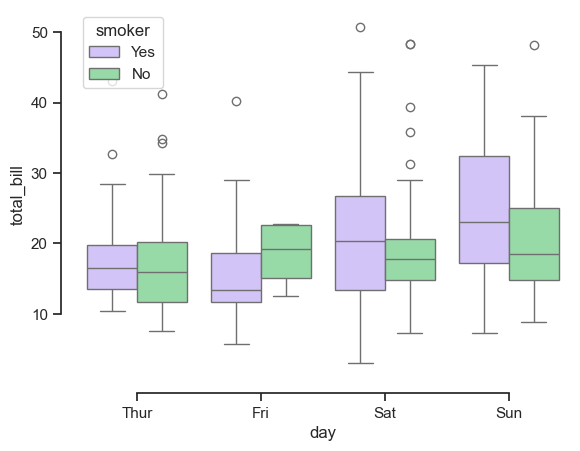

In [343]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

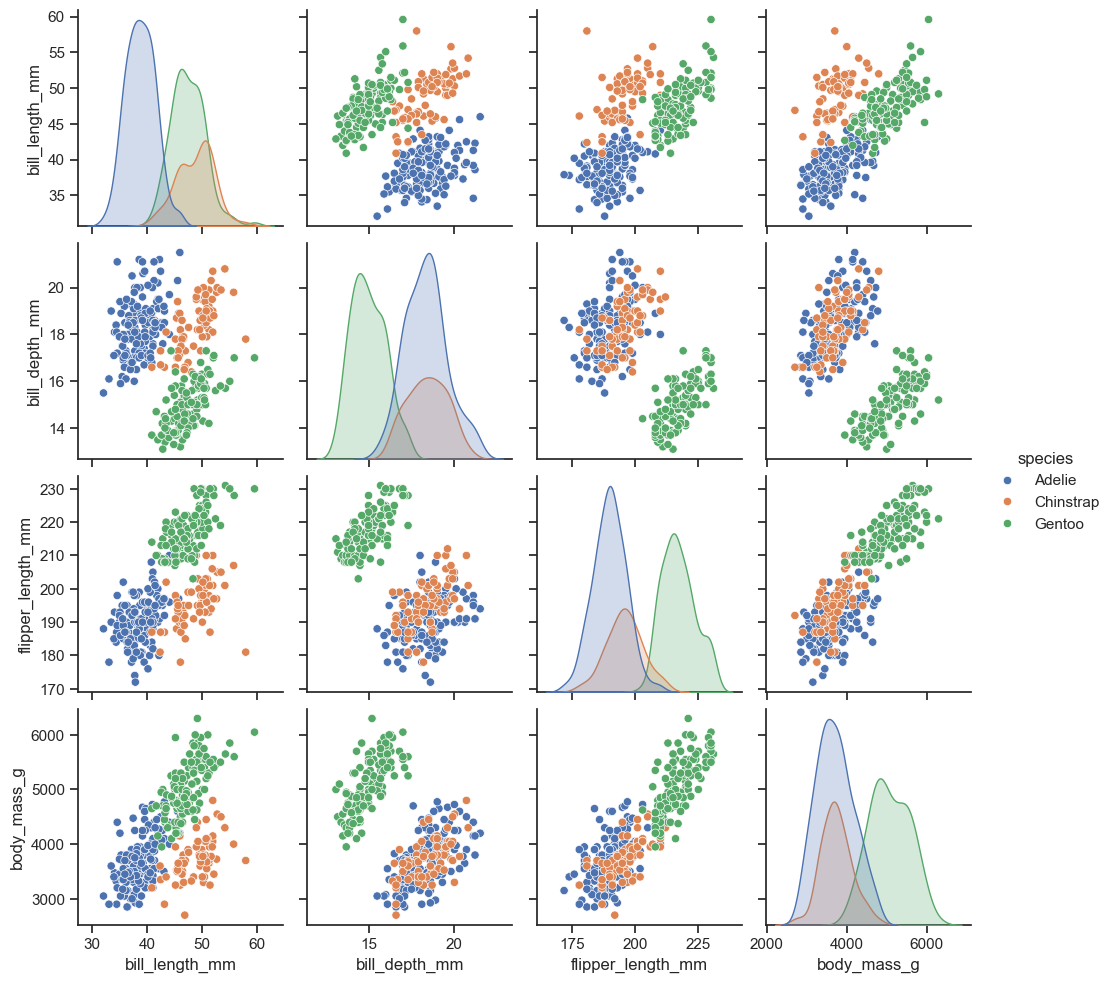

In [ ]:
# Pairplot 
# 정수형 변수 간 상관관계
# 펭귄 데이터
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

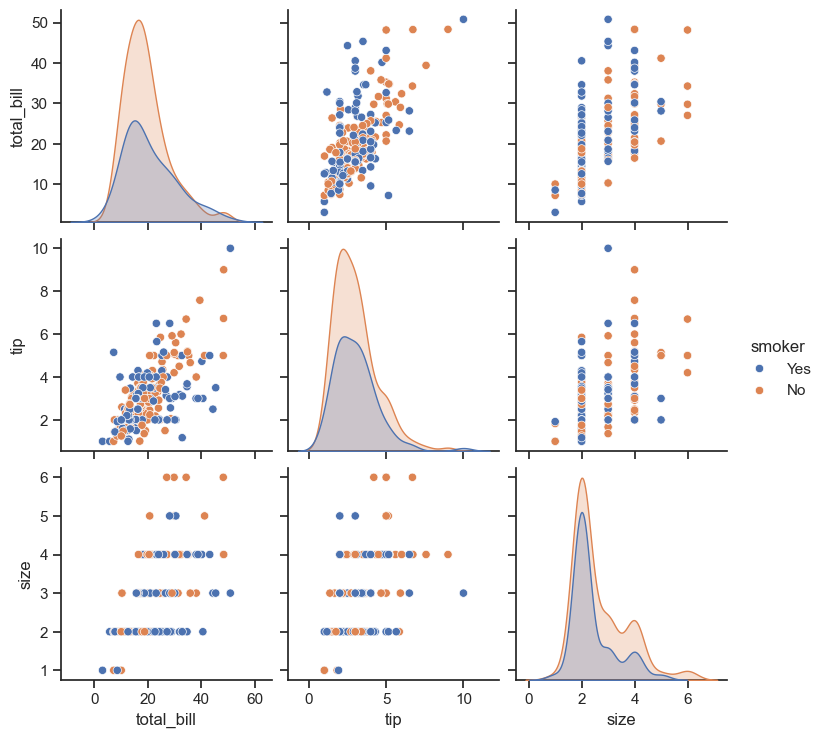

In [351]:
# tips 데이터
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("tips")
sns.pairplot(df, hue="smoker")

### 히스토그램
구간별 분포

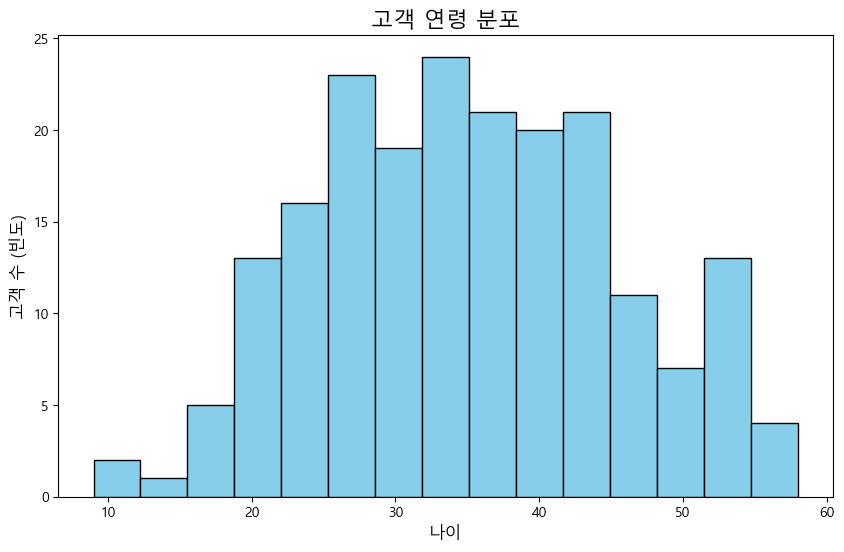

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
np.random.seed(0)
customer_ages = np.random.normal(loc=35, scale=10, size=200).astype(int)
 
plt.figure(figsize=(10, 6))
plt.hist(
    customer_ages,
    bins=15,        #구간
    color='skyblue',
    edgecolor='black'
)
 
plt.title('고객 연령 분포', fontsize=16)
plt.xlabel('나이', fontsize=12)
plt.ylabel('고객 수 (빈도)', fontsize=12)
 
plt.show()

## 미션

In [359]:
# sales_report 불러오기
df = pd.read_csv('./data_0108/sales_report.csv')
df['총구매금액'] = df.groupby('고객명')['구매금액'].transform('sum')
df['고객등급'] = df['총구매금액'].apply(lambda x: 'VIP' if x >= 1000000 else '일반')
df.head(1)

,고객ID,구매일자,제품분류,구매금액,구매채널,할인율,실구매금액,고객명,가입지역,총구매금액,고객등급
0,C001,2025-09-01,가전,1200000,온라인,0.10,1080000,김민준,서울,1297500,VIP


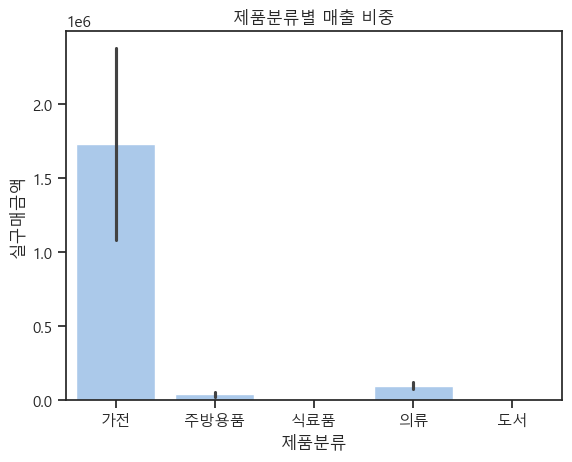

In [381]:
# 제품분류별 매출 비중(Bar Chart) - 어떤 카테고리가 가장 수익이 높은지
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.color_palette("pastel")
sns.barplot(data = df, x = df['제품분류'], y=df['실구매금액'])
plt.title("제품분류별 매출 비중")
plt.show()

In [ ]:
#한글 세팅 다시
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.rcParams['font.family'] = 'Malgun Gothic'

In [389]:
print(df['실구매금액'].min())
print(df['실구매금액'].max())

8500
2375000


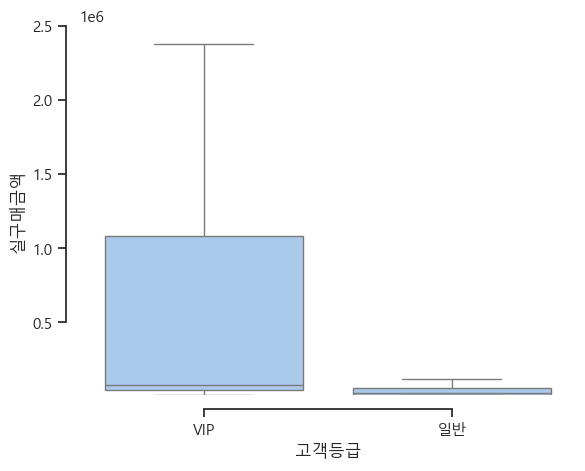

In [404]:
# 고객등급별 구매금액 분포 (Box Plot) - VIP와 일반 고객의 구매 단가 차이 확인
sns.boxplot(data = df,
            x='고객등급', y='실구매금액',
            # hue='고객등급',
            # palette=["m", "g"],
            )
plt.ylim(8000, 2500000)
sns.despine(offset=10, trim=True)

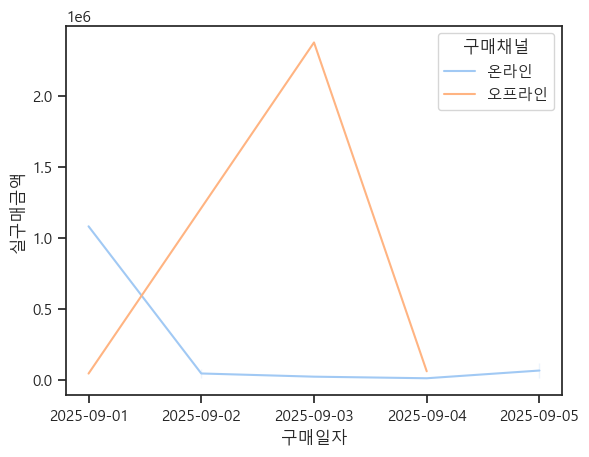

In [384]:
# 일자별 매출 추이 (Line Plot) - 시간의 흐름에 따라 매출이 어떻게 변하는지
by_plat = sns.lineplot(data = df,
             x= df['구매일자'], y = df['실구매금액'],
             hue=df['구매채널'])

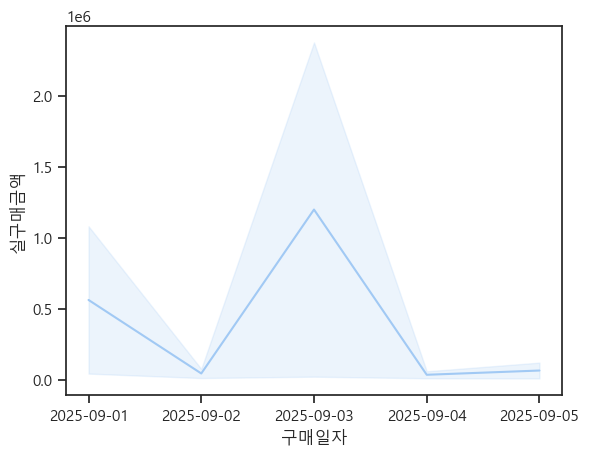

In [400]:
# by_loca = sns.lineplot(data = df,
#              x= df['구매일자'], y = df['실구매금액'],
#              hue=df['가입지역'])
by_loca = sns.lineplot(data = df,
             x= df['구매일자'], y = df['실구매금액'])

<Axes: xlabel='가입지역', ylabel='실구매금액'>

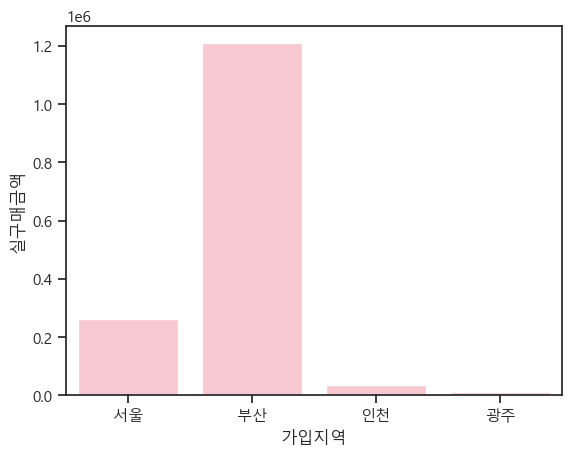

In [386]:
# 지역별 온라인 주문의 비중
sns.barplot(data=df,
            x = df['가입지역'], y=df['실구매금액'],
            errorbar=None, color='pink')